<a href="https://colab.research.google.com/github/sudimuk2017/AI-for-people-Workshop/blob/master/Copy_of_Gathering_Data_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Find the Best Movies?
How do you pick which movie to watch? You may check movie rating websites like Rotten Tomatoes or IMDb to help you chose. These sites contain a number of different metrics which are used to evaluate whether or not you will like a movie. However, because these metrics do not always show on the same page, figuring out the best movies can get confusing.

We can start with the [Rotten Tomatoes: Top 100 Movies of All Time](https://www.rottentomatoes.com/top/bestofrt/).

(Note: this current list may be different than the latest archived list used in this lesson).

## Generate a Word Cloud
For lots of people, Roger Ebert's movie review was the only review they needed because he explained the movie in such a way that they would know whether they would like it or not.

Wouldn't it be neat if we had a word cloud like this one for each of the movies in the top 100 list at [RogerEbert.com](http://www.rogerebert.com/)? We can use a Andreas Mueller's [Word Cloud Generator in Python](https://amueller.github.io/word_cloud/) to help.

The data is in a few different spots, and it will require some craftiness to gather it all, but using the tools you will learn in this lesson, you can definitely do it.

## Accessing The Rotten Tomatoes Top 100 Movies
The inspiration for our project is the Rotten Tomatoes Top 100 Movies of All Time list. Unfortunately, Rotten Tomatoes doesn't provide a file to download, so I'm just going to give it to you for this part of the lesson.

The file is in a TSV file - which stands for tab-separated values.

You can download it here: [Rotten Tomatoes Top 100 Movies of All Time TSV File](https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ca594d_bestofrt/bestofrt.tsv)

In [ ]:
# Import pandas, matplotlib.pyplot, and os
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [ ]:
# Import the Rotten Tomatoes bestofrt TSV file into a DataFrame
critic_df = pd.read_csv('https://raw.githubusercontent.com/michael-fawzy/ALX-T-Data-Analyst/main/Rotten%20Tomatoes/bestofrt.tsv', sep = '\t')

In [ ]:
# Check to see if the file was imported correctly using head()


In [ ]:
# Sort dataframe values according to titles and reset index to facilitate comparison later on
critic_df.sort_values('title', inplace = True, ignore_index = True)
critic_df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,53,100,12 Angry Men (Twelve Angry Men) (1957),49
1,29,96,12 Years a Slave (2013),316
2,22,98,A Hard Day's Night (1964),104
3,60,98,A Streetcar Named Desire (1951),54
4,48,97,Alien (1979),104


In [ ]:
# Check dataset info

## Source: Web Scraping
We want to get Rotten Tomatoes' audience scores and the number of audience reviews to add to our dataset. However, this is not easily accessible from the website and to get this data we will need to do web scraping, which allows us to extract data from websites using code.

How Does Web Scraping Work?
Website data is written in HTML (HyperText Markup Language) which uses tags to structure the page. Because HTML and its tags are just text, the text can be accessed using parsers . We'll be using a Python parser called [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/).

In [ ]:
# Import requests library


### 1.Downloading HTML file programmatically

In [ ]:
# Get URL content
url = 'https://www.rottentomatoes.com/m/et_the_extraterrestrial'
response = requests.get(url)

In [ ]:
# View content of response received from server
response.content

b'<!DOCTYPE html>\n<html lang="en"\n      dir="ltr"\n      xmlns:fb="http://www.facebook.com/2008/fbml"\n      xmlns:og="http://opengraphprotocol.org/schema/">\n\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">\n        \n\n        \n            <script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single"></script>\n        \n        <!-- salt=lay-def-02-juRm -->\n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n        <meta http-equiv="x-ua-compatible" content="ie=edge">\n        <meta name="viewport" content="width=device-width, initial-scale=1">\n\n        <title>E.T. the Extra-Terrestrial - Rotten Tomatoes</title>\n        <meta name="description" content="After a gentle alien becomes stranded on Earth, the being is discovered and befriended by a young boy named Elliott (Henry Thomas). Bringing the extraterrestrial into his suburban California house, Elliott introduces E.T., as the al

In [ ]:
# Save HTML to file

with open("et_the_extraterrestrial.html", mode='wb') as file:
    file.write(response.content)

### 2. Working with the response content live
in your computer's memory using the BeautifulSoup.

Beautiful Soup is an HTML parser written in the Python programming language. The name is derived from the "tag soup" which refers to the unstructured and difficult -to-parse HTML found on many websites.

In [ ]:
# Import BeautifulSoup from bs4


In [ ]:
# Make the Soup
soup = BeautifulSoup(response.content, 'lxml')

In [ ]:

soup

<!DOCTYPE html>
<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single"></script>
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>E.T. the Extra-Terrestrial - Rotten Tomatoes</title>
<meta content="After a gentle alien becomes stranded on Earth, the being is discovered and befriended by a young boy named Elliott (Henry Thomas). Bringing the extraterrestrial into his suburban California house, Elliott introduces E.T., as the alien is dubbed, to his brother and his little sister, Gertie (Drew Barrymore), and the children decide to keep its existence a secret. Soon, however, E

## Accessing HTML in this Lesson
For this lesson, we've downloaded all of the Rotten Tomatoes HTML files for you and put them in a folder called rt_html in the Jupyter Notebooks in the Udacity classroom.

To work outside of the classroom, download [this zip file](https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ca6b7b_rt-html/rt-html.zip) and extract the rt_htmlfolder. I recommend that you do and open the HTML files in your preferred text editor (e.g. [Sublime Text](https://www.sublimetext.com/), which is free) to inspect the HTML for the quizzes ahead.

The rt_html folder contains the Rotten Tomatoes HTML for each of the Top 100 Movies of All Time as the list stood at the most recent update of this lesson. I'm giving you these historical files because the ratings will change over time and there will be inconsistencies with the recorded lesson videos.

Also, a web page's HTML is known to change over time. Scraping code can break easily when web redesigns occur, which makes scraping brittle and not recommended for projects with longevity. So just use these HTML files provided to you and pretend like you saved them yourself with one of the methods described above.

In [ ]:
# import zipfile library

# Download rt_html.zip file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ca6b7b_rt-html/rt-html.zip'

# YoAdd rest of code here (Similar to the code used to download the HTML file)

    


In [ ]:
# Extract all contents from zip file
with zipfile.ZipFile('rt_html.zip', 'r') as myzip:
    myzip.extractall()

#### HTML is Created Using Tags
HTML files are text files that can be opened and inspected in text editors.

An HTML file is a collection of tags.

*More about HTML structure in the [classroom](https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015/modules/356d26d4-2237-46a0-ab78-e0ea93d9501a/lessons/ls0525/concepts/88509d7d-21be-4e88-bf37-67b4bf6b316f)*

In [ ]:
'''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8" />
    <title>HTML Structure</title>
  </head>
  <body>
    <h1>This is a heading.</h1>
    <p>This is a paragraph.</p>
    <span>This is a span.</span>s
    <span>So is this.</span>
    <img src="image.jpg" alt="a picture" />
  </body>
</html>
'''

'\n<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8" />\n    <title>HTML Structure</title>\n  </head>\n  <body>\n    <h1>This is a heading.</h1>\n    <p>This is a paragraph.</p>\n    <span>This is a span.</span>s\n    <span>So is this.</span>\n    <img src="image.jpg" alt="a picture" />\n  </body>\n</html>\n'

In [ ]:
# Get page title that contains the movie title using soup.find()

page_title = soup.find('title') # Finds the first "title" in the page
page_title

<title>E.T. the Extra-Terrestrial - Rotten Tomatoes</title>

In [ ]:
page_title.contents

['E.T. the Extra-Terrestrial - Rotten Tomatoes']

In [ ]:
# Extraxt movie title from page_title.content
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

'E.T. the Extra-Terrestrial'

### Quiz
With your knowledge of HTML file structure, you're going to use Beautiful Soup to extract our desired Audience Score metric and number of audience ratings, along with the movie title (so we have something to merge the datasets on later) for each HTML file, then save them in a pandas DataFrame.

In [ ]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        # Your code here
        # Note: a correct implementation may take ~15 seconds to run
        
        #Make soup
        soup = 
        
        # Get tilte
        title = 
        title = title.replace('\xa0', ' ') # replace \xa0 with space to match titles in critic_df

        # Find audience score in a div with class = 'audience-score meter'.
        # Hint: You will need to check the first span inside this div
        audience_score = 
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',', '')
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})

In [ ]:
# Create dataframe
audience_df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [ ]:
audience_df.head()

,title,audience_score,number_of_audience_ratings
0,Pinocchio (1940),72,278682
1,Vertigo (1958),93,101454
2,High Noon (1952),89,25065
3,Jaws (1975),90,942217
4,Dr. Strangelove Or How I Learned to Stop Worry...,94,208215


In [ ]:
# Sort values by title and reset index


In [ ]:
audience_df.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,12 Years a Slave (2013),90,138789
2,A Hard Day's Night (1964),89,50067
3,A Streetcar Named Desire (1951),90,54761
4,Alien (1979),94,457186


In [ ]:
audience_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       100 non-null    object
 1   audience_score              100 non-null    int64 
 2   number_of_audience_ratings  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [ ]:
# Display common values in title columns
set(critic_df['title']).intersection(set(audience_df['title']))

{'12 Angry Men (Twelve Angry Men) (1957)',
 '12 Years a Slave (2013)',
 "A Hard Day's Night (1964)",
 'A Streetcar Named Desire (1951)',
 'Alien (1979)',
 'All About Eve (1950)',
 'All Quiet on the Western Front (1930)',
 'Apocalypse Now (1979)',
 'Argo (2012)',
 "Army of Shadows (L'Armée des ombres) (1969)",
 'Arrival (2016)',
 'Baby Driver (2017)',
 'Battleship Potemkin (1925)',
 'Bicycle Thieves (Ladri di biciclette) (1949)',
 'Boyhood (2014)',
 'Brooklyn (2015)',
 'Casablanca (1942)',
 'Citizen Kane (1941)',
 'Dr. Strangelove Or How I Learned to Stop Worrying and Love the Bomb (1964)',
 'Dunkirk (2017)',
 'E.T. The Extra-Terrestrial (1982)',
 'Finding Nemo (2003)',
 'Frankenstein (1931)',
 'Get Out (2017)',
 'Gone With the Wind (1939)',
 'Gravity (2013)',
 'Harry Potter and the Deathly Hallows - Part 2 (2011)',
 'Hell or High Water (2016)',
 'High Noon (1952)',
 'Inside Out (2015)',
 'It Happened One Night (1934)',
 'Jaws (1975)',
 'King Kong (1933)',
 'L.A. Confidential (1997)',
 

In [ ]:
# Find values in creitic_df not in audience_df
critic_df[~critic_df['title'].isin(audience_df['title'])]


,ranking,critic_score,title,number_of_critic_ratings


In [ ]:
merged_df = pd.merge(critic_df, audience_df, on = 'title')
merged_df.head()

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,89,874425
1,2,100,Citizen Kane (1941),75,90,157274
2,3,100,The Third Man (1949),77,93,53081
3,4,99,Get Out (2017),282,87,63837
4,5,97,Mad Max: Fury Road (2015),370,86,123937


In [ ]:
merged_df.shape

(100, 6)

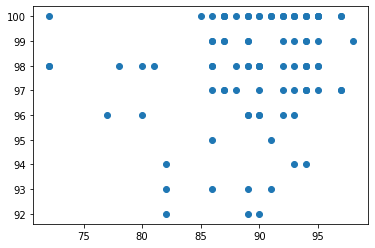

In [ ]:
# Draw scatter plot of audience score vs. critic score in the merged_df


## Source: Downloading Files from the Internet

### Starting the Roger Ebert Review Word Cloud
We'll need the text from each of his reviews, for each of the movies on the Rotten Tomatoes Top 100 Movies of All Time list that live on his website. Lucky for you I've pre-gathered all of this text in the form of 100 .txt files that you can download programmatically.

So downloading files from Internet programmatically is best for scalability and reproducibility. In practice you really only need to know Python's request library, but understanding a bit of HTTP (Hypertext Transfer Protocol) will help you understand what's going on under the hood.

In [ ]:
# Import requests library


In [ ]:
# Make directory if it doesn't already exist
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [ ]:
# Download files to the directory
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

### Opening and Reading From Files
To store data from multiple files in a pandas DataFrame we'll need a loop to iterate through the files and open and read each of them.

Use the ***glob*** library which allows for Unix-style pathname pattern expansion, by using ***glob patterns*** to specify sets of filenames using **wildcard characters**, like `*` that can be used to match a string of any length.

### Using glob

In [ ]:
# Import glob library


In [ ]:
# To return a list of pathnames that match a partial pathname use glob.glob(pathname_to_match)
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    print(ebert_review)

ebert_reviews/54-the-400-blows.txt
ebert_reviews/23-la-grande-illusion.txt
ebert_reviews/85-the-jungle-book-2016-film.txt
ebert_reviews/62-star-wars-the-force-awakens.txt
ebert_reviews/69-the-babadook.txt
ebert_reviews/36-rear-window.txt
ebert_reviews/32-king-kong-1933-film.txt
ebert_reviews/1-the-wizard-of-oz-1939-film.txt
ebert_reviews/57-army-of-shadows.txt
ebert_reviews/66-vertigo-film.txt
ebert_reviews/11-e.t.-the-extra-terrestrial.txt
ebert_reviews/6-the-cabinet-of-dr.-caligari.txt
ebert_reviews/79-the-good-the-bad-and-the-ugly.txt
ebert_reviews/35-rashomon.txt
ebert_reviews/58-arrival-film.txt
ebert_reviews/48-alien-film.txt
ebert_reviews/98-toy-story.txt
ebert_reviews/42-the-big-sick.txt
ebert_reviews/86-la-la-land-film.txt
ebert_reviews/15-boyhood-film.txt
ebert_reviews/55-logan-film.txt
ebert_reviews/59-baby-driver.txt
ebert_reviews/31-sunset-boulevard-film.txt
ebert_reviews/87-star-trek-film.txt
ebert_reviews/43-bride-of-frankenstein.txt
ebert_reviews/51-the-treasure-of-the-

### Reading the File Line-by-Line
Since text files are separated by newline characters and the file object returned from with open as file, is an iterator, we can read the file line-by-line using `file.readline()`

In our movie text files, the title of the movie on the first line of the file followed by a bit of white space, which is actually the \n, or the newline character. We can get rid of that by slicing it off at the end of the string.

`title = file.readline()[:-1]`

Now we've got the movie title. Next, you're going to grab the URL and the full review text.

But first, we'll need to build a pandas DataFrame by creating an empty list and populating it as we iterate through the list of files and converting it to a pandas DataFrame once all of the data has been gathered.

In [ ]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1]
        # Repeat the previous line of code to read the next line in the file
        review_url = 
        # Read the wohle file to get all the text using file.read()
        review_text = 
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'review_url': review_url,
                        'review_text': review_text})

In [ ]:
reviews_df = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])
reviews_df.head()

,title,review_url,review_text
0,The 400 Blows (Les Quatre cents coups) (1959),http://www.rogerebert.com/reviews/great-movie-...,I demand that a film express either the joy of...
1,La Grande illusion (Grand Illusion) (1938),http://www.rogerebert.com/reviews/great-movie-...,"Apart from its other achievements, Jean Renoir..."
2,The Jungle Book (2016),http://www.rogerebert.com/reviews/the-jungle-b...,"I saw the newest Disney version of ""The Jungle..."
3,Star Wars: Episode VII - The Force Awakens (2015),http://www.rogerebert.com/reviews/star-wars-ep...,“Star Wars: Episode VII - The Force Awakens” i...
4,The Babadook (2014),http://www.rogerebert.com/reviews/the-babadook...,I went into “The Babadook” under a kind of mis...


In [ ]:
reviews_df.nunique()

title          88
review_url     88
review_text    88
dtype: int64

## Source: APIs (Application Programming Interfaces)


### Getting the Movie Poster Images
We could scrape the image URL from the HTML. But a better way is to access them through an API (Application Programming Interface). Each movie has its poster on its Wikipedia page, so we can use Wikipedia's API.

APIs give you relatively easy access to data from the Internet. Twitter, Facebook, Instagram all have APIs and there are many open-source APIs.

In this lesson we'll be using [MediaWiki](https://www.mediawiki.org/wiki/MediaWiki), which is a popular open-source API for Wikipedia.

**MediaWiki** has a great [tutorial](https://www.mediawiki.org/wiki/API:Tutorial) on their website on how their API calls are structured. It's a nice and simple example and they explain the various moving parts:

- The endpoint (important takeaway: there is nothing special about this URL!)
- The format
- The action
- Action-specific parameters

Go and read that example and then come back to the classroom.

Done reading? Great! Though they say that is a "simple example," it could definitely be simpler! This is where access libraries, also known as client libraries or even just libraries (as in "Twitter API libraries"), come into play and make our lives easier.

**wptools Library**

There are a bunch of different access libraries for MediaWiki to satisfy the variety of programming languages that exist. Here is a [list](https://www.mediawiki.org/wiki/API:Client_code#Python) for Python. This is pretty standard for most APIs. Some libraries are better than others, which again, is standard. For a MediaWiki, the most up to date and human readable one in Python is called [wptools](https://github.com/siznax/wptools). The analogous relationship for Twitter is:

- MediaWiki API → wptools
- Twitter API → tweepy
wptools has an even simpler tutorial on their [GitHub page](https://github.com/siznax/wptools/wiki/Usage#page-usage) 

In [ ]:
# Run this cell for one time only to install wptools
!pip install wptools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 233 kB 9.1 MB/s 
  Created wheel for pycurl: filename=pycurl-7.45.1-cp37-cp37m-linux_x86_64.whl size=300975 sha256=9401f7727353551a36b6d133ddbdc622fd09f611839fe646d339ddf21c3987d2
  Stored in directory: /root/.cache/pip/wheels/b4/fe/1f/e6cae4153dbc082271bd5763ad36ae255639e4641054db10bc
Successfully built pycurl


In [ ]:
# Import wptools to interact with MediaWiki API
import wptools

In [ ]:
# Get page from wikipedia using page.get() and save it to variable 'page'
page = wptools.page('E.T._the_Extra-Terrestrial').get()

en.wikipedia.org (query) E.T._the_Extra-Terrestrial
en.wikipedia.org (query) E.T. the Extra-Terrestrial (&plcontinue=...
en.wikipedia.org (parse) 73441
www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) P86|Q105702736|Q105701756|P1874|P2529|Q...
www.wikidata.org (labels) Q3897561|Q102180036|P5693|Q461742|P7118...
www.wikidata.org (labels) P1970|P3219|P3135|P921|P1434|P3844|P818...
www.wikidata.org (labels) P2363|P1657|Q1422140|Q4376972|P910|Q103...
www.wikidata.org (labels) P3212|P2638|P5357|Q104144087|P3145|P373...
en.wikipedia.org (restbase) /page/summary/E.T._the_Extra-Terrestrial
en.wikipedia.org (imageinfo) File:ET logo 3.svg|File:E t the extr...
E.T. the Extra-Terrestrial (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  claims: <dict(129)> P1562, P57, P272, P345, P31, P161, P373, P48...
  description: 1982 American science fiction film
  exhtml: <str(485)> <p><i><b>E.T. the E

In [ ]:
# Accessing the image attribute will return all the images for this page


### JSON Structure
JSON is built on two key structures:

**JSON Objects**
JSON objects are a collection of key: value pairs, e.g. key is "Directed by" and the value is "Steven Spielberg" that are surrounded by curly braces.
In Python, JSON objects are interpreted as dictionaries and you can access them like you would a standard Python Dict.
JSON object keys must be strings

**JSON Arrays**
A JSON array is an ordered list of values, e.g.the array of producers, ["Kathleen Kennedy", "Steven Spielberg" ] surrounded by square brackets.
In Python, JSON arrays are interpreted and accessed like lists .
The values for both JSON objects and arrays can be any valid JSON data type: string, number, object, array, Boolean or null.

When objects and arrays are combined, it is called nesting.

In [ ]:
# Find the 'director' key of the 'infobox' attribute of the page


'[[Steven Spielberg]]'

### Downloading Image Files
Downloading images may seem tricky from a reading and writing perspective, in comparison to text files which you can read line by line, for example. But in reality, image files aren't special—they're just binary files. To interact with them, you don't need special software (like Photoshop or something) that "understands" images. You can use regular file opening, reading, and writing techniques, like this:

But this technique can be error-prone. It will work most of the time, but sometimes the file you write to will be damaged.

This type of error is why the requests library maintainers recommend using the PIL library (short for Pillow) and BytesIO from the io library for non-text requests, like images. They recommend that you access the response body as bytes, for non-text requests.

Though you may still encounter a similar file error, this code above will at least warn us with an error message, at which point we can manually download the problematic images.

For example, to create an image from binary data returned by a request:

In [ ]:
# Image URL
image_url = 
image_url


'https://upload.wikimedia.org/wikipedia/en/6/66/E_t_the_extra_terrestrial_ver3.jpg'

In [ ]:
# Run this cell for one time only to install pillows
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Save image to memory
from PIL import Image
from io import BytesIO
r = requests.get(image_url)
i = Image.open(BytesIO(r.content))

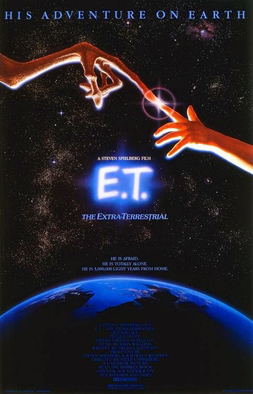

In [ ]:
i

In [ ]:
 # Save image
 i.save('E_t_the_extra_terrestrial_ver3.jpg')

### Quiz
Let's gather the last piece of data for the Roger Ebert review word clouds now: the movie poster image files. Let's also keep each image's URL to add to the master DataFrame later.

Though we're going to use a loop to minimize repetition, here's how the major parts inside that loop will work, in order:

We're going to query the MediaWiki API using wptools to get a movie poster URL via each page object's image attribute.
Using that URL, we'll programmatically download that image into a folder called bestofrt_posters.

In [ ]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [ ]:
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist like we did before


#### Note: the cell below, if correctly implemented, will likely take ~5 minutes to run.

In [ ]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []
image_errors = {}
for title in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(title) + 1
        print(ranking)
        page = wptools.page(title, silent=True)
        # Your code here (three lines)
        images = 
        # First image is usually the poster
        first_image_url = 
        r = 
        # Download movie poster image
        i = 
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images

1
1_The_Wizard_of_Oz_(1939_film): cannot identify image file <_io.BytesIO object at 0x7fdcdc1fdf50>
2
3
3_The_Third_Man: cannot identify image file <_io.BytesIO object at 0x7fdcdc65bf50>
4
5
6
6_The_Cabinet_of_Dr._Caligari: cannot identify image file <_io.BytesIO object at 0x7fdcdbc299b0>
7
7_All_About_Eve: cannot identify image file <_io.BytesIO object at 0x7fdcdbc29fb0>
8
9
10
10_Metropolis_(1927_film): cannot identify image file <_io.BytesIO object at 0x7fdcdbc367d0>
11
12
12_Modern_Times_(film): cannot identify image file <_io.BytesIO object at 0x7fdcdc16f650>
13
14
15
15_Boyhood_(film): 'image'
16
17
18
18_Psycho_(1960_film): cannot identify image file <_io.BytesIO object at 0x7fdcdb5eafb0>
19
19_Laura_(1944_film): cannot identify image file <_io.BytesIO object at 0x7fdcdc395f50>
20
21
22


API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29
23
23_La_Grande_Illusion: cannot identify image file <_io.BytesIO object at 0x7fdcdc36f950>
24
25
26
27
27_The_Maltese_Falcon_(1941_film): cannot identify image file <_io.BytesIO object at 0x7fdcdc3723b0>
28
29
30
31
31_Sunset_Boulevard_(film): cannot identify image file <_io.BytesIO object at 0x7fdcdb2225f0>
32
32_King_Kong_(1933_film): cannot identify image file <_io.BytesIO object at 0x7fdcdc647350>
33
34
34_The_Adventures_of_Robin_Hood: cannot identify image file <_io.BytesIO object at 0x7fdcdc197f50>
35
35_Rashomon: cannot identify image file <_io.BytesIO object at 0x7fdcdc647350>
36
37
38
39
40
41
42
43
43_Bride_of_Frankenstein: cannot identify image file <_io.BytesIO object at 0x7fdcdb613d10>
44
45
45_M_(193

API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


72_Rosemary%27s_Baby_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rosemary%2527s_Baby_%28film%29
73
74
75
76
76_The_39_Steps_(1935_film): cannot identify image file <_io.BytesIO object at 0x7fdcdb646050>
77
78
79
80
81
82
82_Tokyo_Story: cannot identify image file <_io.BytesIO object at 0x7fdcde431590>
83
84
85
86
87
88
88_High_Noon: cannot identify image file <_io.BytesIO object at 0x7fdcdb8de7d0>
89
90
90_On_the_Waterfront: cannot identify image file <_io.BytesIO object at 0x7fdcdc6fafb0>
91
92
93
94
94_The_Grapes_of_Wrath_(film): cannot identify image file <_io.BytesIO object at 0x7fdcdbc361d0>
95
95_Roman_Holiday: cannot identify image file <_io.BytesIO object at 0x7fdcdbc563b0>
96
97
98
99
100
100_Battleship_Potemkin: cannot identify image file <_io.BytesIO object at 0x7fdcdb872530>


Once you have completed the above code requirements, read and run the three cells below and interpret their output.

In [ ]:
# Print images that couldn't be downloaded
for key in image_errors.keys():
    print(key)

2_Citizen_Kane
3_The_Third_Man
6_The_Cabinet_of_Dr._Caligari
7_All_About_Eve
10_Metropolis_(1927_film)
13_It_Happened_One_Night
15_Boyhood_(film)
18_Psycho_(1960_film)
19_Laura_(1944_film)
20_Nosferatu
22_A_Hard_Day%27s_Night_(film)
23_La_Grande_Illusion
24_North_by_Northwest
25_The_Battle_of_Algiers
27_The_Maltese_Falcon_(1941_film)
28_Repulsion_(film)
32_King_Kong_(1933_film)
34_The_Adventures_of_Robin_Hood
36_Rear_Window
40_Argo_(2012_film)
43_Bride_of_Frankenstein
47_The_Philadelphia_Story_(film)
49_Bicycle_Thieves
50_Seven_Samurai
51_The_Treasure_of_the_Sierra_Madre_(film)
56_All_Quiet_on_the_Western_Front_(1930_film)
60_A_Streetcar_Named_Desire_(1951_film)
61_The_Night_of_the_Hunter_(film)
68_Touch_of_Evil
70_The_Conformist_(film)
71_Rebecca_(1940_film)
72_Rosemary%27s_Baby_(film)
76_The_39_Steps_(1935_film)
78_Gone_with_the_Wind_(film)
82_Tokyo_Story
88_High_Noon
90_On_the_Waterfront
91_The_Wages_of_Fear
93_Harry_Potter_and_the_Deathly_Hallows_–_Part_2
94_The_Grapes_of_Wrath_(fi

In [ ]:
'''
# Inspect unidentifiable images and download them individually
for rank_title, images in image_errors.items():
    if rank_title == '22_A_Hard_Day%27s_Night_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/4/47/A_Hard_Days_night_movieposter.jpg'
    if rank_title == '53_12_Angry_Men_(1957_film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/9/91/12_angry_men.jpg'
    if rank_title == '72_Rosemary%27s_Baby_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/e/ef/Rosemarys_baby_poster.jpg'
    if rank_title == '93_Harry_Potter_and_the_Deathly_Hallows_–_Part_2':
        url = 'https://upload.wikimedia.org/wikipedia/en/d/df/Harry_Potter_and_the_Deathly_Hallows_%E2%80%93_Part_2.jpg'
    title = rank_title[3:]
    df_list.append({'ranking': int(title_list.index(title) + 1),
                    'title': title,
                    'poster_url': url})
    r = requests.get(url)
    # Download movie poster image
    i = Image.open(BytesIO(r.content))
    image_file_format = url.split('.')[-1]
    i.save(folder_name + "/" + rank_title + '.' + image_file_format)
'''

In [ ]:

'''
# Create DataFrame from list of dictionaries
df = pd.DataFrame(df_list, columns = ['ranking', 'title', 'poster_url'])
df = df.sort_values('ranking').reset_index(drop=True)
df
'''

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/en/c/ce...
2,3,The_Third_Man,https://upload.wikimedia.org/wikipedia/en/2/21...
3,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...
4,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
5,6,The_Cabinet_of_Dr._Caligari,https://upload.wikimedia.org/wikipedia/commons...
6,7,All_About_Eve,https://upload.wikimedia.org/wikipedia/en/2/22...
7,8,Inside_Out_(2015_film),https://upload.wikimedia.org/wikipedia/en/0/0a...
8,9,The_Godfather,https://upload.wikimedia.org/wikipedia/en/1/1c...
9,10,Metropolis_(1927_film),https://upload.wikimedia.org/wikipedia/en/0/06...


## Storing Data
Storing is usually done after cleaning, but it's not always done, which excludes it from being a core part of the data wrangling process. Sometimes you just analyze and visualize and leave it at that, without saving your new data.

Given the size of this dataset and that it likely won't be shared often, saving to a flat file like a CSV is probably the best solution. With pandas, saving your gathered data to a CSV file is easy. The `to_csv` DataFrame method is all you need and the only parameter required to save a file on your computer is the file path to which you want to save this file. Often specifying `index=False` is necessary too if you don't want the DataFrame index showing up as a column in your stored dataset.

Imagine this merged master dataframe is the final product. It contains all of the data from this entire lesson, plus the assessing and cleaning code done behind the scenes.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/michael-fawzy/ALX-T-Data-Analyst/main/Rotten%20Tomatoes/gathered_assessed_cleaned.csv')

In [ ]:
# Save the master DataFrame to a file called 'bestofrt_master.csv'
# Hint: watch out for the index!


### Relational Databases in Python

For the example in this lesson, we're going to do these in order:

1. Connect to a database. We'll connect to a SQLite database using SQLAlchemy, a database toolkit for Python.

2. Store the data in the cleaned master dataset in that database. We'll do this using pandas' to_sql DataFrame method.

3. Then read the brand new data in that database back into a pandas DataFrame. We'll do this using pandas' read_sql function.

The third one isn’t necessary for this lesson, but often in the workplace, instead of having to download files, scrape web pages, hit an API, etc., you're given a database right at the beginning of a project.

All three of these tasks will be introduced and carried out in the Jupyter Notebook below. These are not quizzes. All of the code is provided for you. Your job is to read and understand each comment and line of code, then run the code.

### 1. Connect to a database

In [ ]:
from sqlalchemy import create_engine

In [ ]:
# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///bestofrt.db')

### 2. Store pandas DataFrame in database
Store the data in the cleaned master dataset (bestofrt_master) in that database.

In [ ]:
# Store cleaned master DataFrame ('df') in a table called master in bestofrt.db
# bestofrt.db will be visible now in the Jupyter Notebook dashboard
df.to_sql('master', engine, index=False)

### 3. Read database data into a pandas DataFrame
Read the brand new data in that database back into a pandas DataFrame.

In [ ]:
df_gather = pd.read_sql('SELECT * FROM master', engine)

In [ ]:
df_gather.head(3)

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text,poster_url
0,1,The Wizard of Oz (1939),99,110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,https://upload.wikimedia.org/wikipedia/en/c/ce...
2,3,The Third Man (1949),100,77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,https://upload.wikimedia.org/wikipedia/en/2/21...
